# NAME : ROSHANI CHAVAN

# The Sparks Foundation #GRIPFEB21 Task 6

# Problem Statement : 

# Prediction Using Decision Tree Algorithm

# Create the Decision Tree classifier and visualize it graphically

 Data set can be found at -  https://bit.ly/3kXTdox

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data

In [2]:
iris=pd.read_csv('Iris.csv',index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Check if the data has any null values

In [3]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values present.

# Checkout the dataset

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Expolatory Data Analysis

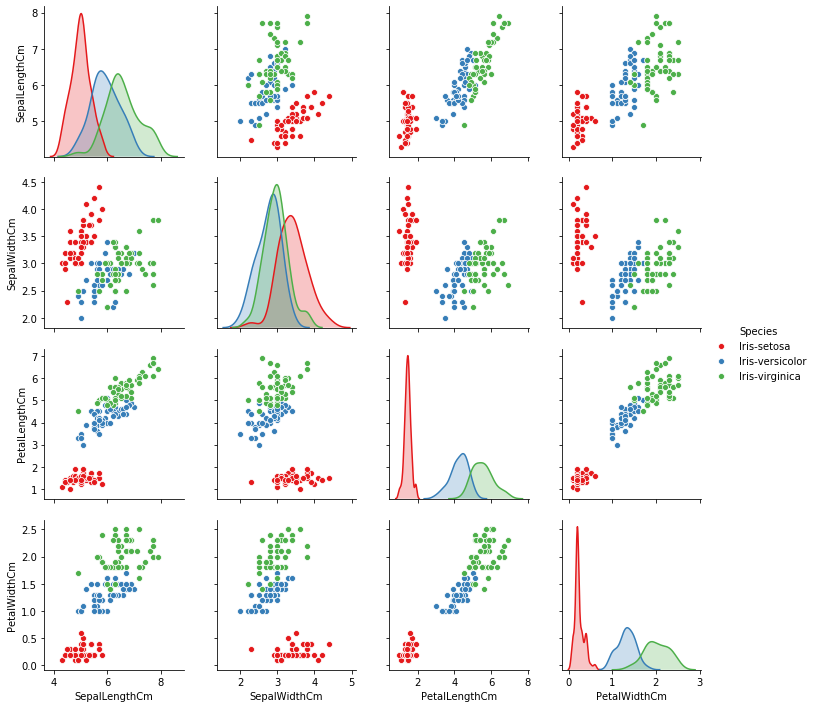

In [7]:
sns.pairplot(iris,hue='Species',palette='Set1')

 Here, we can clearly differentiate the species-'Iris-setosa' as it's cluster does not overlap with the other two species

# Let's split up the data into a training set and a test set!

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#contain all the attributes and labels
X = iris.drop('Species',axis=1)
#Contains the target
y = iris['Species']

In [10]:
X.shape

(150, 4)

In [11]:
y.shape

(150,)

# split the data into test and train.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
print('Shape of Training data :',X_train.shape)
print('Shape of Test data :',X_test.shape)

Shape of Training data : (105, 4)
Shape of Test data : (45, 4)


# Training the Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Decision Tree classifier created

# Prediction and Evaluation

In [17]:
predictions = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.89      0.94      0.92        18

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



In [20]:
print(confusion_matrix(y_test,predictions))

[[15  0  0]
 [ 0 10  2]
 [ 0  1 17]]


In [21]:
#Compare Actual vs Predicted

In [22]:
compare=pd.DataFrame({'Actual':y_test,'Predicted':predictions})

In [23]:
compare.head(n=10)

,Actual,Predicted
Id,,
70,Iris-versicolor,Iris-versicolor
78,Iris-versicolor,Iris-virginica
104,Iris-virginica,Iris-virginica
102,Iris-virginica,Iris-virginica
8,Iris-setosa,Iris-setosa
18,Iris-setosa,Iris-setosa
43,Iris-setosa,Iris-setosa
65,Iris-versicolor,Iris-versicolor
135,Iris-virginica,Iris-versicolor


# Visualize the Decision Tree

In [24]:
from sklearn.tree import plot_tree

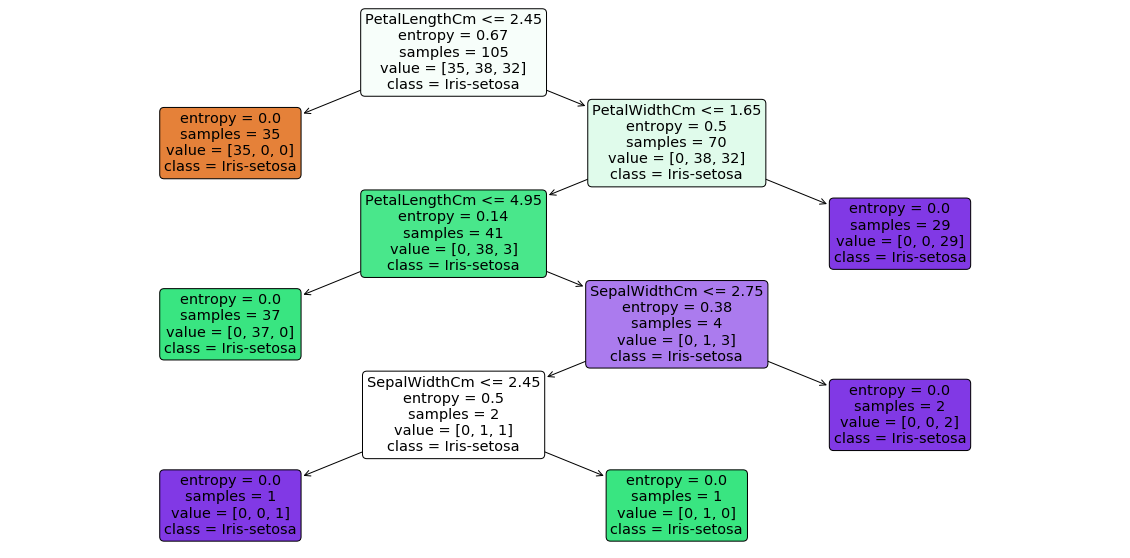

In [25]:
plt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=iris.columns,precision=2,rounded=True,filled=True,class_names=y.values)